# Analisis Exploratorio: Propiedades

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.labelsize'] = 12

In [2]:
propiedades = pd.read_csv('/home/mati/Desktop/properati.csv')
#propiedades = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/properati.csv')

In [3]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455309 entries, 0 to 2455308
Data columns (total 23 columns):
created_on                    object
currency                      object
expenses                      float64
fecha_de_publicacion          object
floor                         float64
lat                           float64
lon                           float64
place_name                    object
place_with_parent_names       object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2              float64
property_type                 object
rooms                         float64
state_name                    object
superficie                    float64
Year                          int64
Month                         int64
Year_created                  int64
Month_created                 int64
cantidad_meses_publicado      int64
dtypes: float64(11), int64(5),

In [6]:
#Compruebo que solo haya capital y gba
propiedades.groupby('state_name').agg(np.size)['Year']

state_name
Bs.As. G.B.A. Zona Norte    820412
Bs.As. G.B.A. Zona Oeste    466592
Bs.As. G.B.A. Zona Sur      238355
Capital Federal             929950
Name: Year, dtype: int64

# Analisis del tipo de propiedad
### Que tipo de propiedad se vende mas?

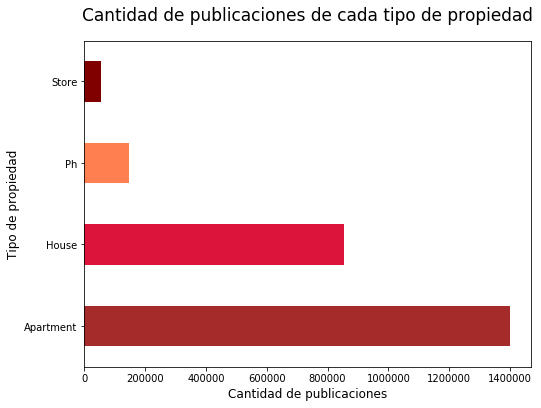

In [5]:
colors_prop = ['brown','crimson', 'coral', 'maroon']

tipos_propiedades = propiedades.loc[:,'property_type'].str.capitalize().value_counts()
plot = tipos_propiedades.plot(kind='barh', color = [colors_prop]);
plot.set_title("Cantidad de publicaciones de cada tipo de propiedad")
plot.set_ylabel("Tipo de propiedad")
plot.set_xlabel("Cantidad de publicaciones")

plt.savefig('informe/imagenes/publicaciones_por_tipo_propiedad.png', bbox_inches = 'tight', pad_inches = 0.5)

In [6]:
precio_tipos_propiedades = propiedades.loc[(propiedades.price_aprox_usd <= 2000000) & (propiedades.price_aprox_usd >= 10000)\
                                           ,['property_type','price_aprox_usd','lat']]
precio_tipos_propiedades.loc[:,'property_type'] = precio_tipos_propiedades.loc[:,'property_type'].str.capitalize()

precio_tipos_propiedades = pd.pivot_table(precio_tipos_propiedades, values='price_aprox_usd', columns=['property_type'],index = 'lat')

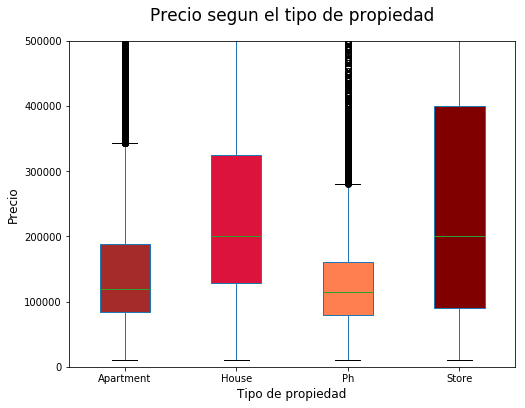

In [7]:
plot = precio_tipos_propiedades.plot.box(patch_artist=True,return_type='dict')
ax=plt.gca()
ax.set_xlabel("Tipo de propiedad")
ax.set_ylabel("Precio")
ax.set_title("Precio segun el tipo de propiedad")
ax.set_ylim([0,500000])

for patch, color in zip(plot['boxes'], colors_prop ):
    patch.set_facecolor(color)

plt.savefig('informe/imagenes/precio_segun_tipo_propiedad.png', bbox_inches = 'tight', pad_inches = 0.5)

In [10]:
precio_tipos_propiedades = propiedades.loc[(propiedades.price_usd_per_m2 <= 10000) & (propiedades.price_usd_per_m2 >= 1000)\
                                           ,['property_type','price_usd_per_m2','lat']]
precio_tipos_propiedades.loc[:,'property_type'] = precio_tipos_propiedades.loc[:,'property_type'].str.capitalize()

precio_tipos_propiedades = pd.pivot_table(precio_tipos_propiedades, values='price_usd_per_m2', columns=['property_type'],index = 'lat')

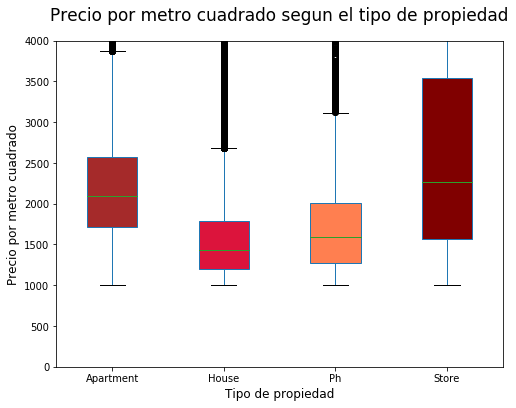

In [137]:
plot = precio_tipos_propiedades.plot.box(patch_artist=True,return_type='dict')
ax=plt.gca()
ax.set_xlabel("Tipo de propiedad")
ax.set_ylabel("Precio por metro cuadrado")
ax.set_title("Precio por metro cuadrado segun el tipo de propiedad")
ax.set_ylim([0,4000])

for patch, color in zip(plot['boxes'], colors_prop ):
    patch.set_facecolor(color)
    
plt.savefig('informe/imagenes/precio_m2_segun_tipo_propiedad.png', bbox_inches = 'tight', pad_inches = 0.5)

# Analisis por zona
### Como es el precio por metro cuadrado en cada zona?

In [3]:
tiene_precio = propiedades['price_usd_per_m2'].notnull()

In [13]:
precio_por_zona = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 10000,['state_name','price_usd_per_m2','lat']]
precio_por_zona.loc[:,'state_name'] = precio_por_zona.loc[:,'state_name'].str.lstrip('Bs.As. ')
precio_por_zona = pd.pivot_table(precio_por_zona, values='price_usd_per_m2', columns=['state_name'],index = 'lat')
precio_por_zona.head(2)

state_name,Capital Federal,G.B.A. Zona Norte,G.B.A. Zona Oeste,G.B.A. Zona Sur
lat,,,,
-89.999744,2200.0,NaN,NaN,NaN
-87.953559,NaN,1833.333333,NaN,NaN


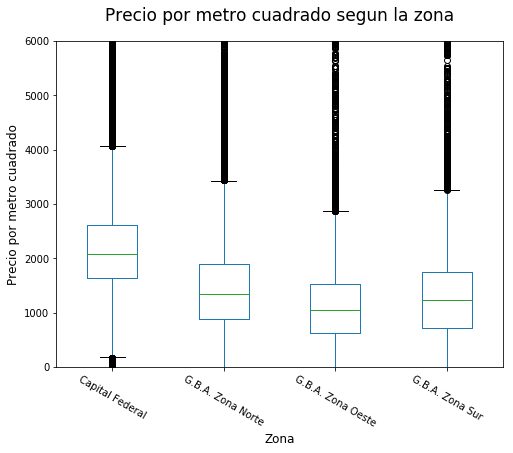

In [14]:
plot = precio_por_zona.plot(kind='box', title = "Precio por metro cuadrado segun la zona", rot = -30);
plot.set_xlabel("Zona")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_ylim([0,6000])

plt.savefig('informe/imagenes/precio_m2.png', bbox_inches = 'tight', pad_inches = 0.5)

In [56]:
precio_por_zona2 = propiedades.loc[propiedades.price_aprox_usd.notnull(),['state_name','price_aprox_usd','lat']]
precio_por_zona2.loc[:,'state_name'] = precio_por_zona2.loc[:,'state_name'].str.lstrip('Bs.As. ')
precio_por_zona2 = pd.pivot_table(precio_por_zona2, values='price_aprox_usd', columns=['state_name'],index = 'lat')
precio_por_zona2.head(2)

state_name,Capital Federal,G.B.A. Zona Norte,G.B.A. Zona Oeste,G.B.A. Zona Sur
lat,,,,
-89.999744,165000.0,NaN,NaN,NaN
-87.953559,NaN,435000.0,NaN,NaN


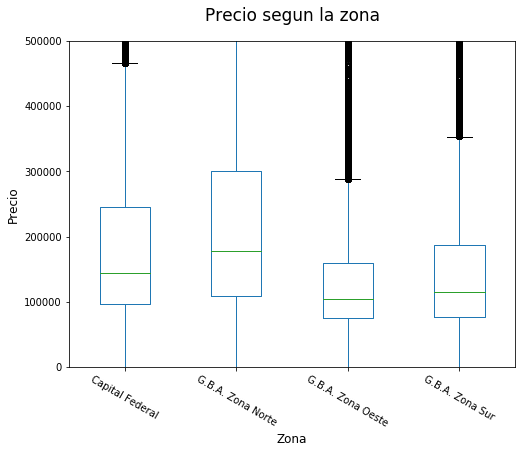

In [58]:
plot = precio_por_zona2.plot(kind='box', title = "Precio segun la zona", rot = -30);
plot.set_xlabel("Zona")
plot.set_ylabel("Precio")
plot.set_ylim([0,500000])

plt.savefig('informe/imagenes/precio__por_zona.png', bbox_inches = 'tight', pad_inches = 0.5)

### Como se distribuyen las casas y departamentos en cada zona

In [87]:
tipo_por_zona = propiedades.loc[:,['state_name','property_type']]
tipo_por_zona.loc[:,'state_name'] = tipo_por_zona.loc[:,'state_name'].str.lstrip('Bs.As. ')
tipo_por_zona.loc[:,'Departamentos'] = tipo_por_zona.loc[:,'property_type'].apply(lambda x: 1 if x == 'apartment' else 0)
tipo_por_zona.loc[:,'Casas'] = tipo_por_zona.loc[:,'property_type'].apply(lambda x: 1 if x == 'house' else 0)
tipo_por_zona = tipo_por_zona.loc[:,['state_name', 'Departamentos','Casas']].groupby('state_name').sum()
tipo_por_zona.head()

,Departamentos,Casas
state_name,,
Capital Federal,768482,76068
G.B.A. Zona Norte,341392,431051
G.B.A. Zona Oeste,189379,230400
G.B.A. Zona Sur,99654,116070


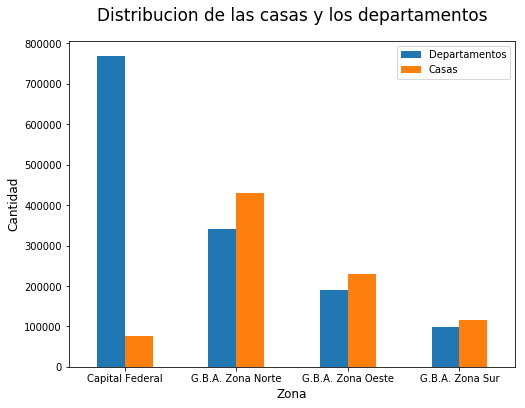

In [91]:
plot = tipo_por_zona.plot(kind = 'bar', rot = 0);
plot.set_xlabel("Zona")
plot.set_ylabel("Cantidad")
plot.set_title("Distribucion de las casas y los departamentos")

plt.savefig('informe/imagenes/distribucion_casas_deptos.png', bbox_inches = 'tight', pad_inches = 0.5)

# Analisis barrial
### Cuales son los barrios con mayor precio promedio?

## Para capital federal

In [22]:
precios_capital = propiedades[tiene_precio].loc[(propiedades.state_name == 'Capital Federal') & (propiedades.place_name != 'Capital Federal')\
                                                ,['place_name','price_usd_per_m2']]
precios_capital = precios_capital.groupby('place_name').agg([np.size,np.mean])
precios_capital.describe()

price_usd_per_m2             
                  size         mean
count        62.000000    62.000000
mean       9916.483871  2362.705459
std       13471.621911   848.444749
min           1.000000   946.108213
25%        1540.750000  1910.677812
50%        5537.000000  2212.195475
75%       11857.000000  2505.198477
max       73901.000000  6392.615387

In [23]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_capital = precios_capital[precios_capital[('price_usd_per_m2','size')] > 800]

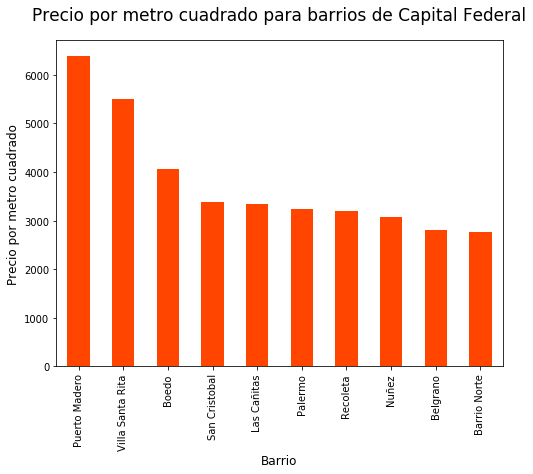

In [24]:
plot = precios_capital[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', color = 'orangered');
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de Capital Federal")

plt.savefig('informe/imagenes/precio_m2_capital.png', bbox_inches = 'tight', pad_inches = 0.5)

### por que Puerto Madero es mucho mas caro que los demas?

In [112]:
puerto_madero = propiedades.loc[(propiedades.price_usd_per_m2.notnull()) & (propiedades.place_name == 'Puerto Madero')\
                    ,['price_usd_per_m2','place_name','property_type','lat']]
puerto_madero = pd.pivot_table(puerto_madero, values='price_usd_per_m2', columns=['property_type'],index = 'lat')
puerto_madero.rename(columns = {"apartment":"Departamentos","house":"Casas","store":"Negocios"},inplace = True)
puerto_madero.head()

property_type,PH,Departamentos,Casas,Negocios
lat,,,,
-34.700668,NaN,5905.511811,NaN,NaN
-34.659107,NaN,6285.714286,NaN,NaN
-34.658192,NaN,5473.214286,NaN,NaN
-34.631848,NaN,1500.000000,NaN,NaN
-34.628335,NaN,3557.692308,NaN,NaN


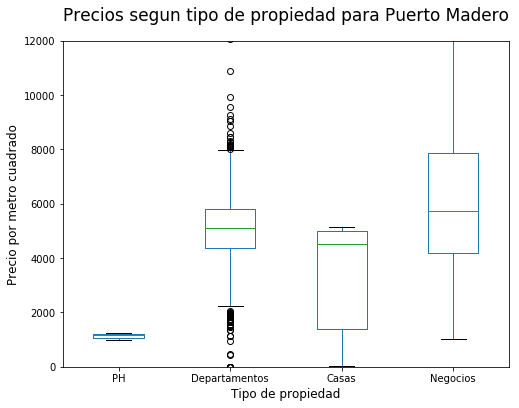

In [113]:
plot = puerto_madero.plot(kind='box', title = "Precios segun tipo de propiedad para Puerto Madero", rot = 0);
plot.set_xlabel("Tipo de propiedad")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_ylim([0,12000])

plt.savefig('informe/imagenes/puerto_madero.png', bbox_inches = 'tight', pad_inches = 0.5)

## Para gba zona norte

In [18]:
precios_zona_norte = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Norte'),['place_name','price_usd_per_m2']]
precios_zona_norte = precios_zona_norte.groupby('place_name').agg([np.size,np.mean])
precios_zona_norte.describe()

price_usd_per_m2              
                  size          mean
count       340.000000    340.000000
mean       1794.217647   1684.577780
std        7414.215056   1945.461670
min           1.000000     86.700571
25%          17.000000   1007.050859
50%          69.000000   1290.205656
75%         260.250000   1857.814938
max       68810.000000  28194.815849

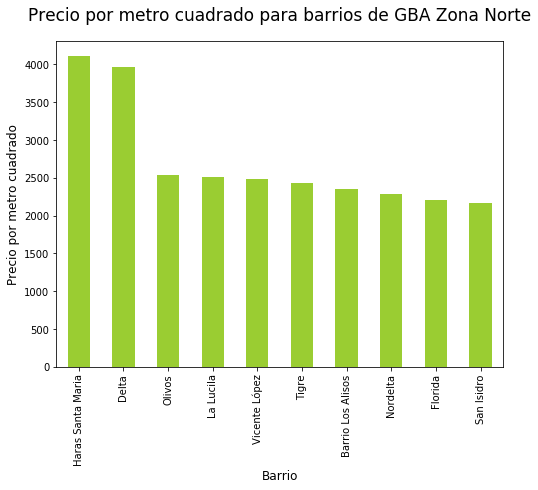

In [19]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_zona_norte = precios_zona_norte[precios_zona_norte[('price_usd_per_m2','size')] > 800]
plot = precios_zona_norte[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar',color = 'yellowgreen');
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de GBA Zona Norte")

plt.savefig('informe/imagenes/precio_m2_norte.png', bbox_inches = 'tight', pad_inches = 0.5)

## Para gba zona oeste

In [20]:
precios_zona_oeste = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Oeste'),['place_name','price_usd_per_m2']]
precios_zona_oeste = precios_zona_oeste.groupby('place_name').agg([np.size,np.mean])
precios_zona_oeste.describe()

price_usd_per_m2              
                  size          mean
count        88.000000     88.000000
mean       3034.602273   1402.926238
std        7045.519291   1558.779652
min           1.000000     40.870430
25%          66.750000    770.781965
50%         346.000000   1055.920853
75%        2194.750000   1539.934805
max       48490.000000  11598.750000

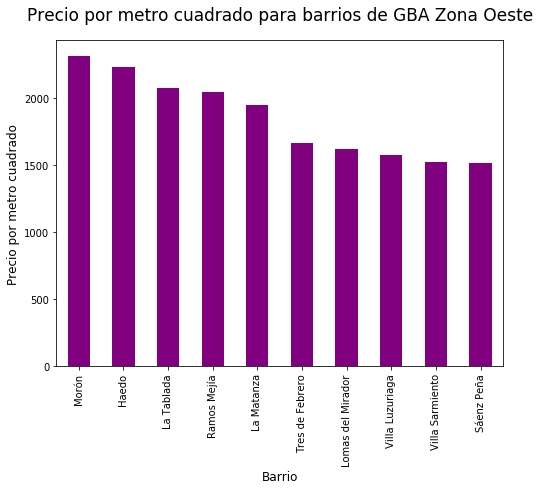

In [21]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_zona_oeste = precios_zona_oeste[precios_zona_oeste[('price_usd_per_m2','size')] > 800]
plot = precios_zona_oeste[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', color = 'purple');
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de GBA Zona Oeste")

plt.savefig('informe/imagenes/precios_m2_oeste.png', bbox_inches = 'tight', pad_inches = 0.5)

## Para gba zona sur

In [22]:
precios_zona_sur = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Sur'),['place_name','price_usd_per_m2']]
precios_zona_sur = precios_zona_sur.groupby('place_name').agg([np.size,np.mean])
precios_zona_sur.describe()

price_usd_per_m2               
                  size           mean
count       144.000000     144.000000
mean        906.069444    2342.159877
std        2844.642482    9190.094238
min           1.000000       0.000000
25%          24.000000     643.241429
50%          72.500000    1087.644434
75%         451.250000    1594.669353
max       22160.000000  102857.142857

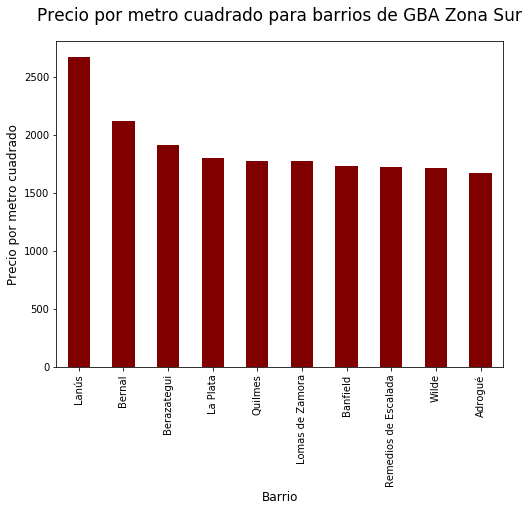

In [23]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_zona_sur = precios_zona_sur[precios_zona_sur[('price_usd_per_m2','size')] > 800]
plot = precios_zona_sur[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar',color = 'maroon');
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de GBA Zona Sur")

plt.savefig('informe/imagenes/precios_m2_sur.png', bbox_inches = 'tight', pad_inches = 0.5)

# Analisis: Evolucion a traves del tiempo
### Como evoluciono el precio al pasar los anios?

In [24]:
precio_por_anio = propiedades[tiene_precio].loc[:,['Year','price_usd_per_m2']].groupby('Year').agg([np.size,np.mean])
precio_por_anio = precio_por_anio.loc[precio_por_anio[('price_usd_per_m2','size')] > 100,:]
precio_por_anio

price_usd_per_m2             
                 size         mean
Year                              
2013         199349.0  2369.190254
2014         345284.0  1890.479226
2015         450676.0  1714.803593
2016         311484.0  2151.086818
2017         381930.0  2735.672688

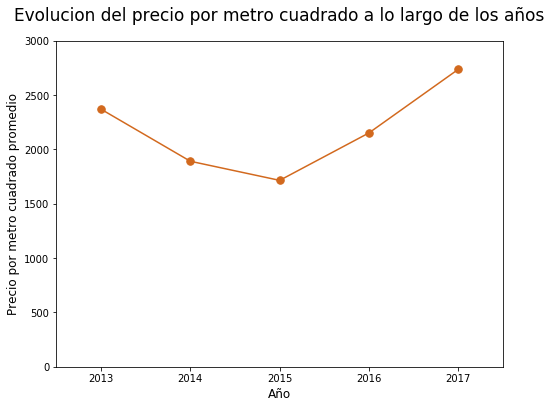

In [25]:
plot = precio_por_anio[('price_usd_per_m2','mean')].plot(marker = '.', markersize = 15, color = 'chocolate');
plot.set_xlabel("Año")
plot.set_ylabel("Precio por metro cuadrado promedio")
plot.set_ylim([0,3000])
plot.set_xlim([2012.5,2017.5])
plot.set_xticks([2013,2014,2015,2016,2017])
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los años");

plt.savefig('informe/imagenes/evolucion_pecio_m2.png', bbox_inches = 'tight', pad_inches = 0.5)

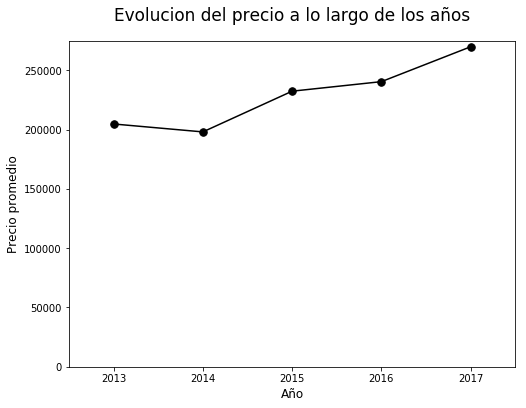

In [26]:
precio_por_anio2 = propiedades.loc[propiedades.price_aprox_usd.notnull(),['Year','price_aprox_usd']].groupby('Year').agg([np.size,np.mean])
precio_por_anio2 = precio_por_anio2.loc[precio_por_anio2[('price_aprox_usd','size')] > 100,:]
plot = precio_por_anio2[('price_aprox_usd','mean')].plot(color='black',marker = '.', markersize = 15);
plot.set_xlabel("Año")
plot.set_ylabel("Precio promedio")
plot.set_ylim([0,275000])
plot.set_xlim([2012.5,2017.5])
plot.set_title("Evolucion del precio a lo largo de los años")
plot.set_xticks([2013,2014,2015,2016,2017]);

plt.savefig('informe/imagenes/evolucion_precio.png', bbox_inches = 'tight', pad_inches = 0.5)

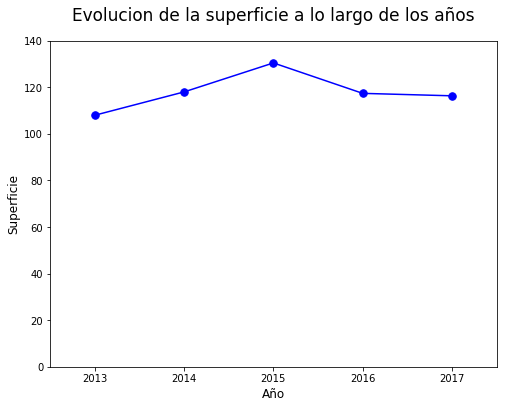

In [27]:
precio_por_anio3 = propiedades.loc[(propiedades.superficie.notnull()) & (propiedades.superficie < 500),['Year','superficie']].groupby('Year').agg([np.size,np.mean])
precio_por_anio3 = precio_por_anio3.loc[precio_por_anio3[('superficie','size')] > 100,:]
plot = precio_por_anio3[('superficie','mean')].plot(color='blue',marker = '.', markersize = 15);
plot.set_xlabel("Año")
plot.set_ylabel("Superficie")
plot.set_title("Evolucion de la superficie a lo largo de los años")
plot.set_xlim([2012.5,2017.5])
plot.set_ylim([0,140])
plot.set_xticks([2013,2014,2015,2016,2017]);

plt.savefig('informe/imagenes/evolucion_superficie.png', bbox_inches = 'tight', pad_inches = 0.5)

## Como evoluciono el precio por metro cuadrado en en cada anio?

In [28]:
precios_2016 = propiedades[tiene_precio].loc[propiedades.Year == 2016,['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)
precios_2015 = propiedades[tiene_precio].loc[propiedades.Year == 2015,['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)
precios_2014 = propiedades[tiene_precio].loc[propiedades.Year == 2014,['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)

In [29]:
precios_2016 = precios_2016.rename(columns={'price_usd_per_m2': '2016'}).reset_index()
precios_2015 = precios_2015.rename(columns={'price_usd_per_m2': '2015'}).reset_index()
precios_2014 = precios_2014.rename(columns={'price_usd_per_m2': '2014'}).reset_index()
precios = pd.merge(precios_2016,precios_2015,on='Month',how='outer')
precios = pd.merge(precios,precios_2014,on='Month',how='outer')
precios.set_index('Month', inplace = True)
precios

,2016,2015,2014
Month,,,
1,1831.190767,1677.568481,2102.573404
2,1849.816972,1723.479619,2079.900913
3,1966.921313,1565.270512,1912.878483
4,2059.532984,1583.533208,1928.181890
5,2078.260781,1607.606635,1911.892901
6,2095.725003,1629.178322,1928.651897
7,2160.555576,1618.955606,1938.728071
8,2208.922107,1712.221020,1697.860709
9,2231.013673,1657.230560,1657.700065


In [30]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto',\
                 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

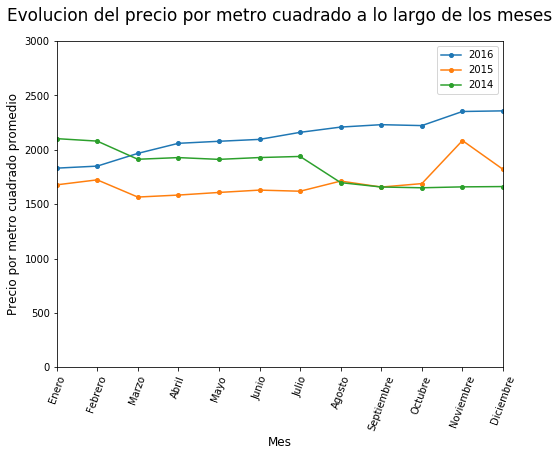

In [31]:
plot = precios.plot(rot = 70, marker = '.', markersize = 8);
plot.set_xlabel("Mes")
plot.set_ylabel("Precio por metro cuadrado promedio")
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los meses")
plot.set_ylim([0,3000]);
plot.set_xticks(precios.index);
plot.set_xticklabels(meses);

plt.savefig('informe/imagenes/evolucion_precio_m2_por_mes.png', bbox_inches = 'tight', pad_inches = 0.5)

## Evolucion del precio segun el tipo de propiedad

In [59]:
agrupados = propiedades.loc[(propiedades.price_aprox_usd.notnull()) & (propiedades.property_type != 'store')\
                            ,['property_type','Year','price_usd_per_m2','lat']]
agrupados.rename(columns = {'property_type':'Tipo de propiedad'},inplace = True)
agrupados = agrupados.pivot_table(index = ['lat','Year'], columns = 'Tipo de propiedad').reset_index()
agrupados = agrupados.groupby('Year').agg(np.mean)
agrupados = agrupados.loc[:,'price_usd_per_m2']
agrupados

/home/mati/anaconda3/lib/python3.6/site-packages/pandas/core/base.py:331: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  return self.obj.drop(self.exclusions, axis=1)


Tipo de propiedad,PH,apartment,house
Year,,,
2013,1999.004779,2466.107677,1658.295814
2014,1677.827646,2130.384834,1346.081561
2015,1608.334047,2236.095288,1222.627890
2016,1787.006056,2302.727126,1693.696910
2017,2130.370788,2677.111778,2089.710976


In [60]:
agrupados.rename(columns = {'apartment':'Departamentos','house':'Casas'},inplace = True)

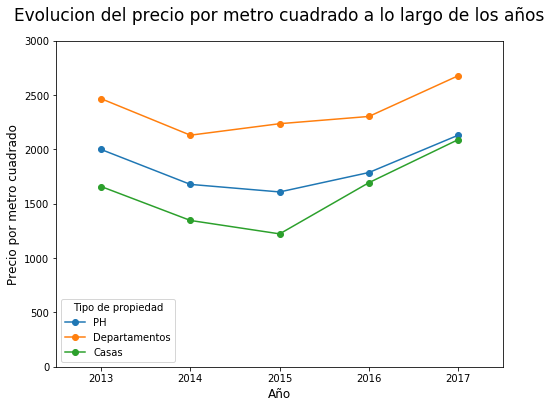

In [61]:
plot = agrupados.plot(marker = '.',markersize = 12);
plot.set_ylim([0,3000]);
plot.set_xlabel("Año")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los años")
plot.set_xlim([2012.5,2017.5])
plot.set_xticks([2013,2014,2015,2016,2017]);

plt.savefig('informe/imagenes/evolucion_precio_m2_por_tipo.png', bbox_inches = 'tight', pad_inches = 0.5)

## Evolucion del precio segun la zona

In [62]:
agrupados2 = propiedades.loc[(propiedades.price_aprox_usd.notnull()),['state_name','Year','price_aprox_usd','lat']]
agrupados2.rename(columns = {'state_name':'Zona'},inplace = True)
agrupados2 = agrupados2.pivot_table(index = ['lat','Year'], columns = 'Zona').reset_index()
agrupados2 = agrupados2.groupby('Year').agg(np.mean)
agrupados2 = agrupados2.loc[:,'price_aprox_usd']
agrupados2

/home/mati/anaconda3/lib/python3.6/site-packages/pandas/core/base.py:331: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  return self.obj.drop(self.exclusions, axis=1)


Zona,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal
Year,,,,
2013,214571.766785,137981.686203,172830.404974,212615.772363
2014,231936.840163,139064.807661,152680.551115,209082.335424
2015,257856.655862,149286.571685,161683.665755,214098.093240
2016,265008.401255,138533.638706,142866.107307,243850.882075
2017,285604.604951,151610.177637,179428.469922,265622.652192


In [63]:
agrupados2.rename(columns = {'Bs.As. G.B.A. Zona Norte':'G.B.A. Zona Norte','Bs.As. G.B.A. Zona Sur':'G.B.A. Zona Sur',\
                           'Bs.As. G.B.A. Zona Oeste':'G.B.A. Zona Oeste'},inplace = True)

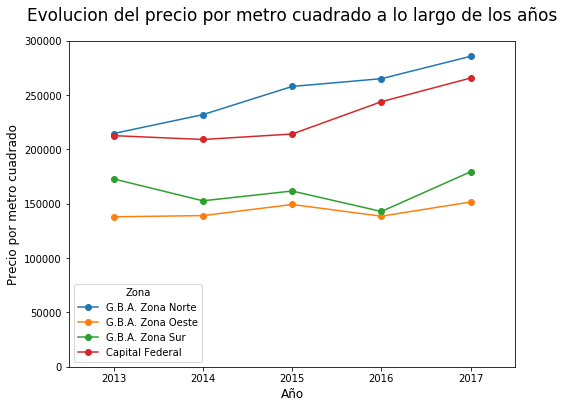

In [64]:
plot = agrupados2.plot(marker = '.',markersize = 12);
plot.set_ylim([0,300000]);
plot.set_xlabel("Año")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los años")
plot.set_xlim([2012.5,2017.5])
plot.set_xticks([2013,2014,2015,2016,2017]);

plt.savefig('informe/imagenes/evolucion_precio_total_por_zona.png', bbox_inches = 'tight', pad_inches = 0.5)

## Tomamos algunos barrios importantes y hacemos comparaciones

In [9]:
barrios = ['Palermo', 'Vicente López', 'Lomas de Zamora', 'La Matanza']  #Elegi uno de cada zona
df = []
for barrio in barrios:
    a = propiedades[tiene_precio].loc[propiedades.place_name == barrio,['Year','price_usd_per_m2']]\
    .groupby('Year').agg(np.mean).reset_index().rename(columns={'price_usd_per_m2' : barrio})
    df.append(a)

In [10]:
precios_barrios = df[0]
for x in range (1,len(barrios)):
    precios_barrios = pd.merge(precios_barrios,df[x],how='outer')
precios_barrios.set_index("Year",inplace = True)
precios_barrios

,Palermo,Vicente López,Lomas de Zamora,La Matanza
Year,,,,
2013,3045.593394,2773.353764,2468.826751,2821.583231
2014,2965.790436,2175.935660,1587.086071,1867.924150
2015,3139.452200,2140.177017,1592.004317,1625.846192
2016,3318.524747,2429.855370,1612.371211,1930.060818
2017,3601.772003,3346.559792,1997.987134,1888.998619


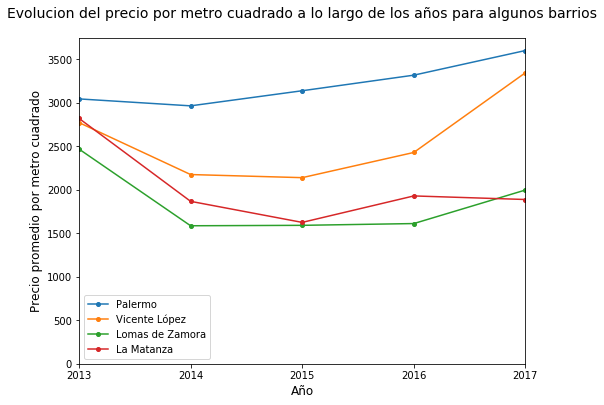

In [12]:
plot = precios_barrios.plot(marker = '.', markersize = 8);
plot.set_xlabel("Año")
plot.set_ylabel("Precio promedio por metro cuadrado")
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los años para algunos barrios",size = 14)
plot.set_ylim([0,3750]);
plot.set_xticks([2013,2014,2015,2016,2017]);

plt.savefig('informe/imagenes/evolucion_precio_m2_algunos_barrios.png', bbox_inches = 'tight', pad_inches = 0.5)

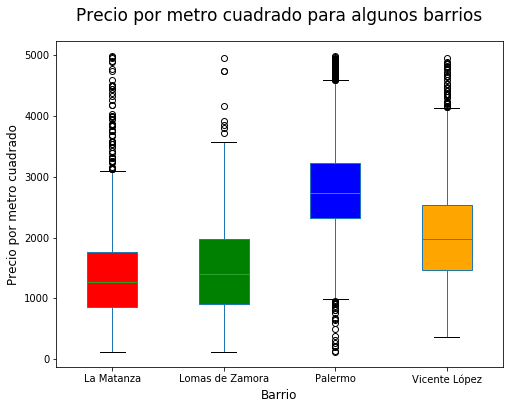

In [13]:
precios_barrios2 = propiedades.loc[(propiedades.price_usd_per_m2 < 5000) &\
                        (propiedades.price_usd_per_m2 > 100)&((propiedades.place_name == barrios[0]) | \
                          (propiedades.place_name == barrios[1]) | (propiedades.place_name == barrios[2])\
                        | (propiedades.place_name == barrios[3]) ),\
        ['lon','place_name','price_usd_per_m2']].pivot_table(index='lon',columns='place_name')
precios_barrios2.columns = precios_barrios2.columns.droplevel()
boxplot = precios_barrios2.plot.box(patch_artist=True,return_type='dict', title="Precio por metro cuadrado para algunos barrios");
ax=plt.gca()
ax.set_ylabel('Precio por metro cuadrado')
ax.set_xlabel('Barrio')


colors = ['red' , 'green', 'blue','orange'] #Mismos colores del grafico de lineas de arriba
    
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig('informe/imagenes/precio_m2_algunos_barrios.png', bbox_inches = 'tight', pad_inches = 0.5)

## Cantidad de casas, departamentos y negocios en barrios caros

In [45]:
barrios_caros = list(precios_capital[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).keys())
barrios_caros

['Puerto Madero',
 'Villa Santa Rita',
 'Boedo',
 'San Cristobal',
 'Las Cañitas',
 'Palermo',
 'Recoleta',
 'Nuñez',
 'Belgrano',
 'Barrio Norte']

In [46]:
tipo_prop = propiedades.loc[(propiedades.property_type == 'house') | (propiedades.property_type == 'apartment'),:]\
.groupby(['property_type','place_name']).agg(np.size)

In [47]:
departamentos = []
casas = []
for x in barrios_caros:
    departamentos.append(tipo_prop.floor['apartment'][x])
    casas.append(tipo_prop.floor['house'][x])

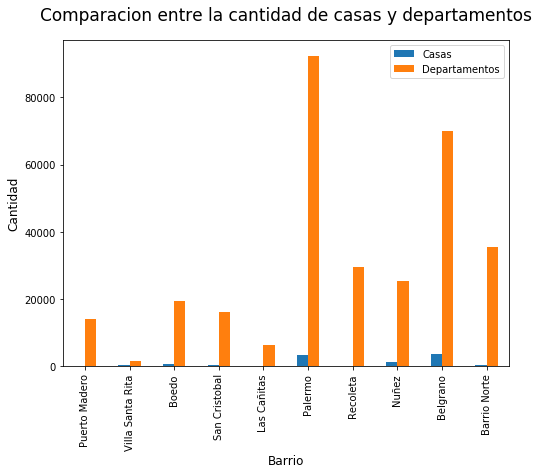

In [48]:
df = pd.DataFrame({'Casas':casas, 'Departamentos' : departamentos}, index = barrios_caros)

plot = df.plot(kind = 'bar');
plot.set_xlabel("Barrio")
plot.set_ylabel("Cantidad")
plot.set_title("Comparacion entre la cantidad de casas y departamentos")

plt.savefig('informe/imagenes/comparacion_casas_deptos.png', bbox_inches = 'tight', pad_inches = 0.5)

#### Se puede ver que la cantidad de departamentos supera enormemente a la cantidad de casas en los 5 barrios mas caros de Capital Federal.

In [52]:
barrios_baratos = list(precios_capital[('price_usd_per_m2','mean')].sort_values().head(10).keys())
barrios_baratos

['Mataderos',
 'Parque Avellaneda',
 'Boca',
 'Constitución',
 'Pompeya',
 'Liniers',
 'Villa Real',
 'Parque Patricios',
 'Villa Pueyrredón',
 'Floresta']

In [53]:
departamentos = []
casas = []
for x in barrios_baratos:
    departamentos.append(tipo_prop.floor['apartment'][x])
    casas.append(tipo_prop.floor['house'][x])

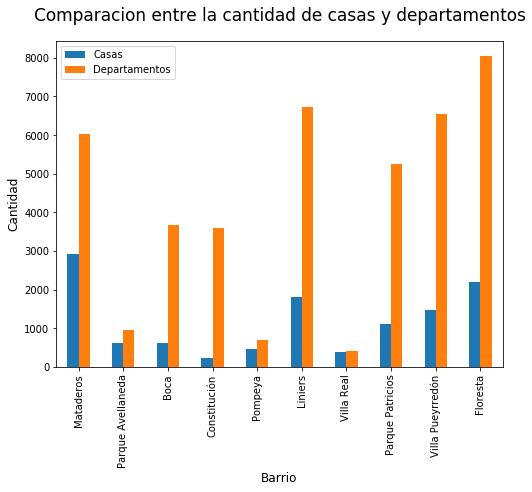

In [54]:
df = pd.DataFrame({'Casas':casas, 'Departamentos' : departamentos}, index = barrios_baratos)

plot = df.plot(kind = 'bar');
plot.set_xlabel("Barrio")
plot.set_ylabel("Cantidad")
plot.set_title("Comparacion entre la cantidad de casas y departamentos")

plt.savefig('informe/imagenes/comparacion_casas_deptos2.png', bbox_inches = 'tight', pad_inches = 0.5)

# Analisis: Que factores afectan al precio?

### Relacion entre precio y cantidad de habitaciones

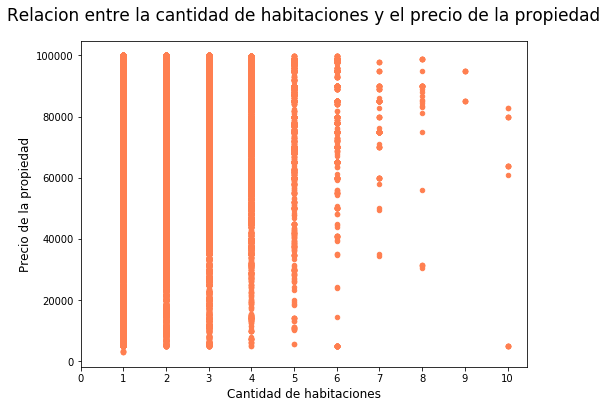

In [4]:
tiene_precio_usd = propiedades['price_aprox_usd'].notnull()
tiene_habitaciones = propiedades['rooms'].notnull() & propiedades['rooms'] > 0
hab = propiedades.loc[tiene_precio_usd & tiene_habitaciones,:]
hab = hab.loc[(hab['price_aprox_usd'] > 1000) & (hab['price_aprox_usd'] < 100000) & (hab['rooms'] <= 10),:]
plot = hab.plot.scatter(y = 'price_aprox_usd', x = 'rooms', color = 'coral');
plot.set_ylabel("Precio de la propiedad")
plot.set_xlabel("Cantidad de habitaciones")
plot.set_title("Relacion entre la cantidad de habitaciones y el precio de la propiedad")
plot.set_xticks(list(range(11)));

plt.savefig('informe/imagenes/cantidad_habitaciones_y_precio.png', bbox_inches = 'tight', pad_inches = 0.5)

#### se ve que las propiedades mas baratas no tiene mas de 4-5 habitaciones y que solo las mas caras tiene mas de 6

## Relacion entre el precio y el piso del depto

In [7]:
piso_maximo = 20  

departamentos = propiedades.loc[(propiedades.property_type == 'apartment') & (propiedades.floor.notnull())\
                               & (propiedades.floor <= piso_maximo)]
departamentos['floor'].describe()

count    388377.000000
mean          4.504072
std           3.615925
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          20.000000
Name: floor, dtype: float64

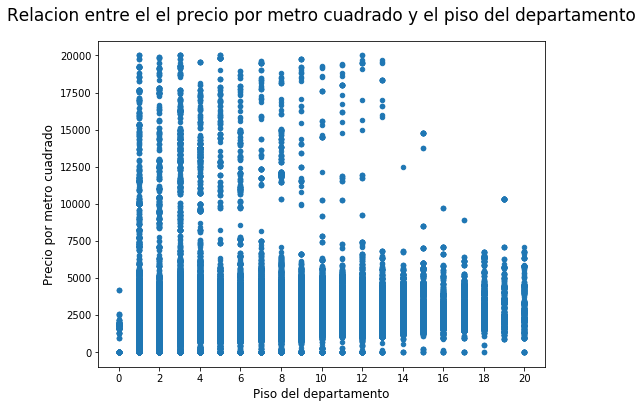

In [8]:
plot = departamentos.loc[(departamentos.price_usd_per_m2.notnull()) & (departamentos.price_usd_per_m2 <= 20000), :].plot\
            .scatter(x = 'floor', y = 'price_usd_per_m2');
plot.set_xlabel("Piso del departamento");
plot.set_ylabel("Precio por metro cuadrado");
plot.set_title("Relacion entre el el precio por metro cuadrado y el piso del departamento");
plot.set_xticks(list(range(0,21,2)));

plt.savefig('informe/imagenes/Relacion_precio_piso.png', bbox_inches = 'tight', pad_inches = 0.5)

#### cuanto mas alto, mas barato el precio por m2

# Analisis: Precio segun distancias a lugares

In [9]:
#El archivo es el obtenido al ejecutar Calcular distancias

solo_capital = pd.read_csv('/home/mati/Desktop/solo_capital.csv')
#solo_capital = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/solo_capital.csv')

## Relacion entre precios y distancia a lugares importantes

In [119]:
solo_capital['distancia_monumentos'].describe()

count    854010.000000
mean          3.407633
std           4.748730
min           0.011439
25%           1.134176
50%           2.384136
75%           3.817520
max          73.781522
Name: distancia_monumentos, dtype: float64

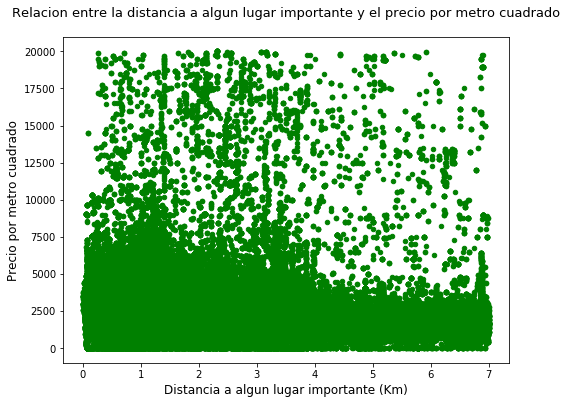

In [29]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & \
                        (solo_capital.distancia_monumentos < 7),:]
plot = dist.plot.scatter(x = 'distancia_monumentos', y = 'price_usd_per_m2', color = 'green');
plot.set_xlabel("Distancia a algun lugar importante (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia a algun lugar importante y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_precio_distancia_lugares_importantes.png', bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre el precio y cercania a los subtes

In [121]:
solo_capital['distancia_subtes'].describe()

count    854010.000000
mean          1.511363
std           4.512966
min           0.000328
25%           0.329358
50%           0.628763
75%           1.154480
max          74.175040
Name: distancia_subtes, dtype: float64

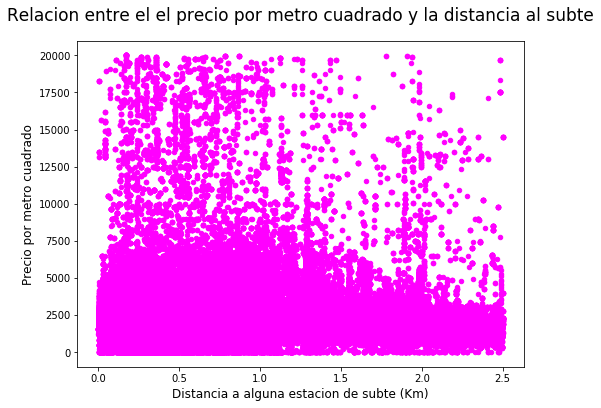

In [31]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) &\
                        (solo_capital.distancia_subtes < 2.5),:]
plot = dist.plot.scatter(x = 'distancia_subtes', y = 'price_usd_per_m2', color = 'fuchsia');
plot.set_xlabel("Distancia a alguna estacion de subte (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre el el precio por metro cuadrado y la distancia al subte")

plt.savefig('informe/imagenes/Relacion_precio_distancia_subte.png', bbox_inches = 'tight', pad_inches = 0.5)

## Precio según la distancia a estadios

In [123]:
solo_capital['distancia_estadios'].describe()

count    854010.000000
mean          2.163391
std           4.261051
min           0.016482
25%           1.054489
50%           1.623409
75%           2.337971
max          73.379965
Name: distancia_estadios, dtype: float64

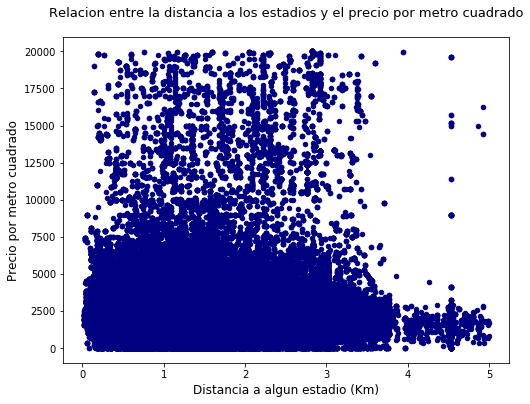

In [24]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & \
                        (solo_capital.distancia_estadios < 5),:]
plot = dist.plot.scatter(x = 'distancia_estadios', y = 'price_usd_per_m2', color = 'navy');
plot.set_xlabel("Distancia a algun estadio (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia a los estadios y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_distancia_estadios_precio_m2.png',bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precio y distancia a ferrocarriles

In [125]:
solo_capital['distancia_ferrocarril'].describe()

count    854010.000000
mean          1.476525
std           4.215710
min           0.004265
25%           0.580326
50%           0.914144
75%           1.387432
max          73.071740
Name: distancia_ferrocarril, dtype: float64

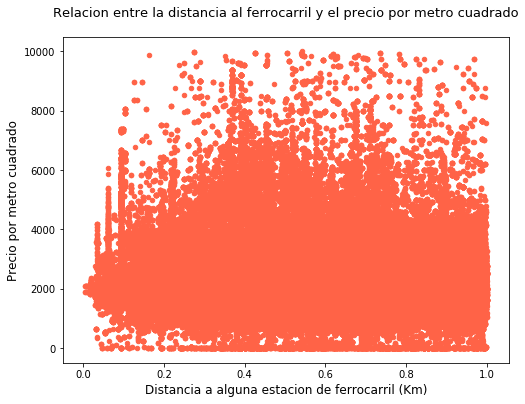

In [32]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 10000) & \
                        (solo_capital.distancia_ferrocarril < 1),:]
plot = dist.plot.scatter(x = 'distancia_ferrocarril', y = 'price_usd_per_m2', color = 'tomato');
plot.set_xlabel("Distancia a alguna estacion de ferrocarril (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia al ferrocarril y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_distancia_ferrocarril_precio_m2.png',bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precio y zonas de inundaciones

In [127]:
solo_capital['Zona_inundacion'].value_counts()

False    741463
True     112547
Name: Zona_inundacion, dtype: int64

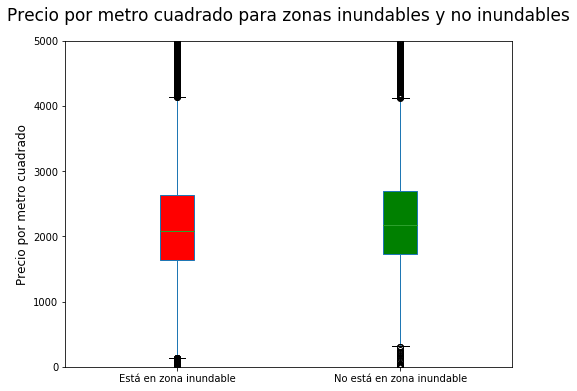

In [12]:
inundaciones = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) ,\
                               ['lat','price_usd_per_m2', 'Zona_inundacion']]\
                .pivot_table(index='lat',columns='Zona_inundacion')
inundaciones.columns = inundaciones.columns.droplevel()
boxplot = inundaciones.plot.box(patch_artist=True,return_type='dict', \
                                title="Precio por metro cuadrado para zonas inundables y no inundables");
ax=plt.gca()
ax.set_ylabel('Precio por metro cuadrado')
ax.set_xticklabels(['Está en zona inundable', 'No está en zona inundable'])
ax.set_ylim([0,5000]);


colors = ['red' , 'green'] 
    
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig('informe/imagenes/Precio_m2_en_zonas_inundables.png',bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precio y cercania a las villas

In [10]:
solo_capital.loc[:, 'distancia_villas'] = solo_capital.loc[:,'distancia_villas'].apply(lambda x: 0 if x < 0 else x)

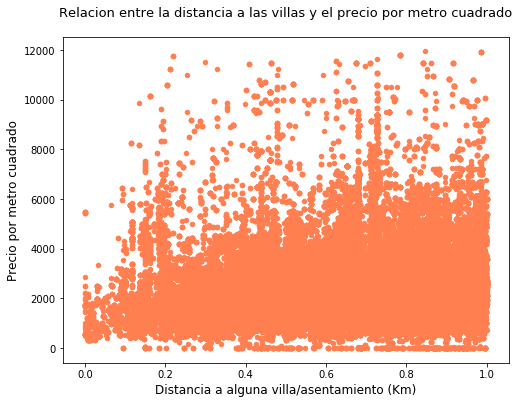

In [27]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 12000) & (solo_capital.distancia_villas < 1),:]
plot = dist.plot.scatter(x = 'distancia_villas', y = 'price_usd_per_m2', color = 'coral');
plot.set_xlabel("Distancia a alguna villa/asentamiento (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia a las villas y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_distancia_villa_precio_m2.png',bbox_inches = 'tight', pad_inches = 0.5)

# Analisis: Otros datos interesantes

## relacion entre expensas y precio total

In [129]:
expensas = propiedades.loc[(propiedades.expenses.notnull()) & (propiedades.expenses <= 10000) & (propiedades.expenses > 100),:]

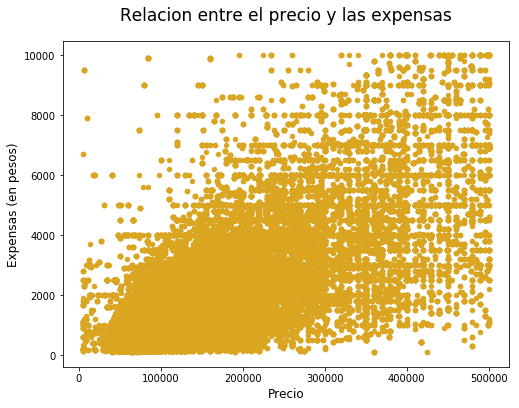

In [130]:
expensas_y_precio = expensas.loc[(expensas.price_aprox_usd.notnull()) & (expensas.price_aprox_usd <= 500000) & (expensas.price_aprox_usd > 100),:]
plot = expensas_y_precio.plot.scatter(y = 'expenses', x = 'price_aprox_usd', color = 'goldenrod');
plot.set_ylabel("Expensas (en pesos)")
plot.set_xlabel("Precio")
plot.set_title("Relacion entre el precio y las expensas")

plt.savefig('informe/imagenes/Relacion_precio_expensas.png', bbox_inches = 'tight', pad_inches = 0.5)

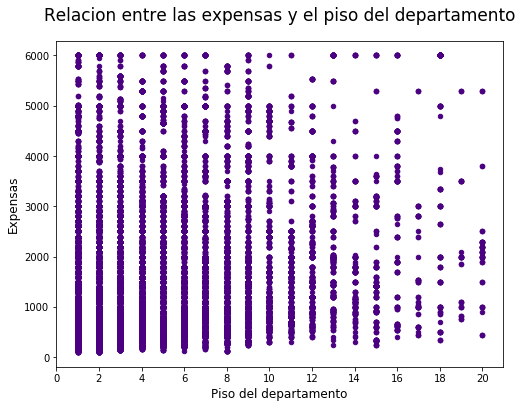

In [131]:
expensas_y_piso = expensas.loc[(expensas.floor.notnull()) & (expensas.floor <= piso_maximo) & (expensas.expenses <= 6000),:]
plot = expensas_y_piso.plot.scatter(y = 'expenses', x = 'floor', color = 'indigo');
plot.set_ylabel("Expensas")
plot.set_xlabel("Piso del departamento")
plot.set_title("Relacion entre las expensas y el piso del departamento");
plot.set_xticks(list(range(0,21,2)));

plt.savefig('informe/imagenes/Relacion_expensas_piso.png', bbox_inches = 'tight', pad_inches = 0.5)

#### cuanto mas caro mas expensas paga

## Barrios mas centricos(mas negocios)

In [74]:
negocios = propiedades.loc[(propiedades.state_name == 'Capital Federal') & (propiedades.property_type == 'store') \
                & (propiedades.place_name != 'Capital Federal'),:]\
.groupby('place_name').agg(np.size)['property_type'].sort_values(ascending = False).head(10)

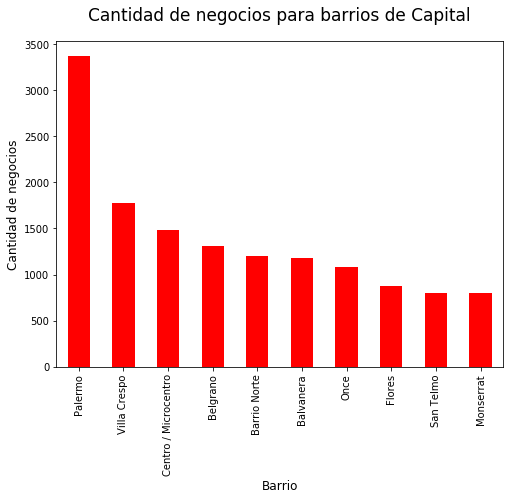

In [75]:
plot = negocios.plot(kind='bar', color = 'red');
plot.set_xlabel("Barrio")
plot.set_ylabel("Cantidad de negocios")
plot.set_title("Cantidad de negocios para barrios de Capital")

plt.savefig('informe/imagenes/negocios_capital.png', bbox_inches = 'tight', pad_inches = 0.5)

## Analizando fecha de creacion y fecha de publicacion

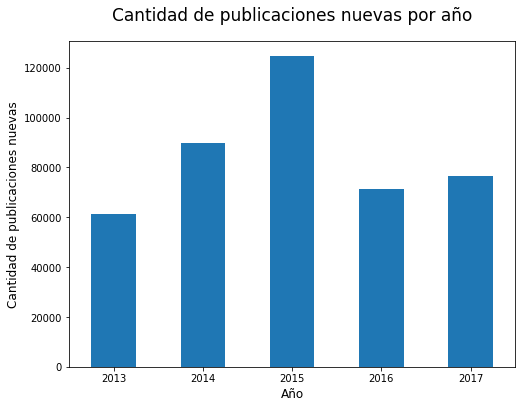

In [132]:
publicaciones = propiedades.loc[(propiedades.Year == propiedades.Year_created) & (propiedades.Month == propiedades.Month_created),['Month','Year']]
plot = publicaciones.groupby('Year').agg([np.size,np.mean])[('Month', 'size')].plot(kind = 'bar', rot = 0);
plot.set_ylabel("Cantidad de publicaciones nuevas")
plot.set_xlabel("Año")
plot.set_title("Cantidad de publicaciones nuevas por año")

plt.savefig('informe/imagenes/cantidad_publicaciones_nuevas_por_anio.png', bbox_inches = 'tight', pad_inches = 0.5)

In [133]:
publicados = propiedades.loc[:,['lat','lon','cantidad_meses_publicado', 'Year','Month']].groupby(['lat','lon']).max()
publicados.head()

,,cantidad_meses_publicado,Year,Month
lat,lon,,,
-89.999744,135.000000,2,2015,11
-87.953559,164.531250,3,2015,11
-76.516815,100.000000,4,2014,11
-58.804368,58.804368,3,2014,12
-58.430839,-34.571160,3,2014,12


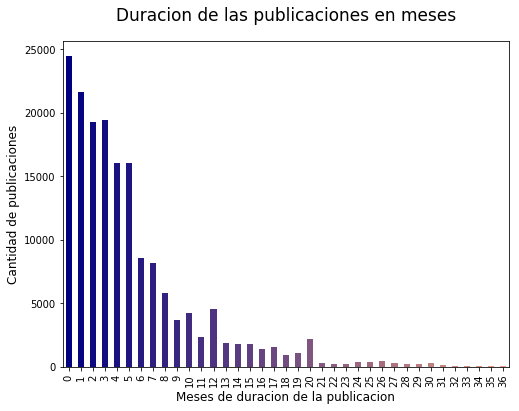

In [134]:
publicados = publicados.loc[(publicados.Year != 2017) | (publicados.Month < 7),:] #Elimino los de julio 2017 porque puede ser que no hayan terminado
publicados = publicados.loc[(publicados.cantidad_meses_publicado >= 0) & (publicados.cantidad_meses_publicado <= 36),:]
publicados = publicados.groupby('cantidad_meses_publicado').agg([np.size,np.mean])[('Year','size')]

my_colors = [(x/40.0, x/60.0, 0.5) for x in range(len(publicados))]

plot = publicados.plot(kind = 'bar', color = [my_colors]);
plot.set_ylabel("Cantidad de publicaciones")
plot.set_xlabel("Meses de duracion de la publicacion")
plot.set_title("Duracion de las publicaciones en meses")

plt.savefig('informe/imagenes/Duracion_publicaciones_en_meses.png',bbox_inches = 'tight', pad_inches = 0.5)

# Analisis: Comodidades (Casos especificos usando la descripcion)

In [ ]:
#descripciones = pd.read_csv('/home/mati/Desktop/propiedades_descripcion.csv')
descripciones = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/propiedades_descripcion.csv')

In [ ]:
descripciones = descripciones.loc[descripciones.description.notnull(),:]
descripciones= descripciones.loc[(descripciones.Year==2016) | (descripciones.Year==2017),:]

# Descarto los negocios
descripciones = descripciones.loc[descripciones.property_type != 'store',:]

In [ ]:
tiene_precio = descripciones['price_usd_per_m2'].notnull()

In [135]:
def tiene_cadena(cadena, lista):
    cadena = str(cadena)
    cadena = cadena.lower()
    resultado = False
    for x in lista:
        resultado = resultado or (x in cadena)
    return resultado

### Precio segun pileta

In [ ]:
cadenas = ['pileta', 'piscina', 'picina','pisina', 'yaccuzi', ' jacuzzi', 'jacuzi',\
           'yacuzi', 'yacusi', 'jacussi', 'hidromasaje']
descripciones.loc[:,'Pileta'] = descripciones.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [ ]:
descripciones.Pileta.describe()

In [ ]:
pileta = descripciones[tiene_precio].loc[ :,['Pileta','price_usd_per_m2']]
pileta = pileta.groupby('Pileta').agg([np.size,np.mean])

pileta.head()

In [ ]:
pileta = descripciones[tiene_precio].loc[descripciones.price_usd_per_m2 <= 20000,['Pileta','price_usd_per_m2','lat']]
pileta = pd.pivot_table(pileta, values='price_usd_per_m2', columns=['Pileta'],index = 'lat')
pileta.head(2)

In [ ]:
plot = pileta.plot(kind='box', title = "Precio por metro cuadrado segun si tiene pileta", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene pileta', 'Tiene pileta'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_pileta.png', bbox_inches = 'tight', pad_inches = 0.5)

### Precio segun si tiene elementos de climatizacion

In [ ]:
cadenas = ['aire frio', 'aire acondicionado', 'split', 'aires acondicionados', 'climatizador', 'central',\
          'losa radiante', 'piso radiante', 'pisoradiante', 'loza radiante', 'los radiantes', 'radante',
          'radiador']
descripciones.loc[:,'aire'] = descripciones.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))
descripciones.aire.describe()

In [ ]:
descripciones[tiene_precio].loc[ :,['aire','price_usd_per_m2']].groupby('aire').agg([np.size,np.mean]).head()

In [ ]:
aire = descripciones[tiene_precio].loc[descripciones.price_usd_per_m2 <= 20000,['aire','price_usd_per_m2','lat']]
aire = pd.pivot_table(aire, values='price_usd_per_m2', columns=['aire'],index = 'lat')
aire.head(2)

In [ ]:
plot = aire.plot(kind='box', title = "Precio por metro cuadrado segun si tiene climatizacion", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene', 'Tiene'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_climatizacion.png', bbox_inches = 'tight', pad_inches = 0.5)

### Precio si tiene cochera

In [ ]:
cadenas = ['cochera', 'garage', 'estacionamiento', 'entrada de auto']
descripciones.loc[:,'cochera'] = descripciones.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))
propiedades.cochera.describe()

In [ ]:
descripciones[tiene_precio].loc[ :,['cochera','price_usd_per_m2']].groupby('cochera').agg([np.size,np.mean]).head()

In [ ]:
garage = descripciones[tiene_precio].loc[descripciones.price_usd_per_m2 <= 20000,['cochera','price_usd_per_m2','lat']]
garage = pd.pivot_table(garage, values='price_usd_per_m2', columns=['cochera'],index = 'lat')
garage.head(2)

In [ ]:
plot = garage.plot(kind='box', title = "Precio por metro cuadrado segun si tiene cochera", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene cochera', 'Tiene cochera'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_cochera.png', bbox_inches = 'tight', pad_inches = 0.5)

### Tiene lago/vista al mar

In [ ]:
cadenas = ['lago', 'mar']
descripciones.loc[:,'lago'] = descripciones.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))
descripciones.lago.describe()

In [ ]:
descripciones[tiene_precio].loc[ :,['lago','price_usd_per_m2']].groupby('lago').agg([np.size,np.mean]).head()

In [ ]:
lago = descripciones[tiene_precio].loc[descripciones.price_usd_per_m2 <= 20000,['lago','price_usd_per_m2','lat']]
lago = pd.pivot_table(lago, values='price_usd_per_m2', columns=['lago'],index = 'lat')
lago.head(2)

In [ ]:
plot = lago.plot(kind='box', title = "Precio por metro cuadrado segun si tiene lago", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene lago', 'Tiene lago'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_lago.png', bbox_inches = 'tight', pad_inches = 0.5)

### Precio segun si Tiene parrilla

In [ ]:
cadenas = ['parrilla', 'asador', 'asado', 'asadera']
descripciones.loc[:,'parrilla'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))
descripciones.parrilla.describe()

In [ ]:
descripciones[tiene_precio].loc[ :,['parrilla','price_usd_per_m2']].groupby('parrilla').agg([np.size,np.mean]).head()

In [ ]:
parrilla = descripciones[tiene_precio].loc[descripciones.price_usd_per_m2 <= 20000,['parrilla','price_usd_per_m2','lat']]
parrilla = pd.pivot_table(parrilla, values='price_usd_per_m2', columns=['parrilla'],index = 'lat')
parrilla.head(2)

In [ ]:
plot = parrilla.plot(kind='box', title = "Precio por metro cuadrado segun si tiene parrilla", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene parrilla', 'Tiene parrilla'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_parrilla.png', bbox_inches = 'tight', pad_inches = 0.5)

### Precio segun si Tienen gimnasio

In [ ]:
cadenas = ['gimnasio', 'gym', 'gimnacio']
descripciones.loc[:,'gimnasio'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))
descripciones.gimnasio.describe()

In [ ]:
descripciones[tiene_precio].loc[ :,['gimnasio','price_usd_per_m2']].groupby('gimnasio').agg([np.size,np.mean]).head()

In [ ]:
gim = descripciones[tiene_precio].loc[descripciones.price_usd_per_m2 <= 20000,['gimnasio','price_usd_per_m2','lat']]
gim = pd.pivot_table(gim, values='price_usd_per_m2', columns=['gimnasio'],index = 'lat')
gim.head(2)

In [ ]:
plot = gim.plot(kind='box', title = "Precio por metro cuadrado segun si tiene gimnasio", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene gimnasio', 'Tiene gimnasio'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_gimnasio.png', bbox_inches = 'tight', pad_inches = 0.5)

### Tiene elementos que aportan a la seguridad

In [ ]:
cadenas = ['vigilancia', 'seguridad', 'alarma', 'blindado', 'blindaje', 'guardia']
descripciones.loc[:,'seguridad'] = descripciones.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))
descripciones.seguridad.describe()

In [ ]:
descripciones[tiene_precio].loc[ :,['seguridad','price_usd_per_m2']].groupby('seguridad').agg([np.size,np.mean]).head()

In [ ]:
vig = descripciones[tiene_precio].loc[descripciones.price_usd_per_m2 <= 20000,['seguridad','price_usd_per_m2','lat']]
vig = pd.pivot_table(vig, values='price_usd_per_m2', columns=['seguridad'],index = 'lat')
vig.head(2)

In [ ]:
plot = vig.plot(kind='box', title = "Precio por metro cuadrado segun si tiene vigilancia", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene vigilancia', 'Tiene vigilancia'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_vigilancia.png', bbox_inches = 'tight', pad_inches = 0.5)

### Tiene comodidades

In [ ]:
cadenas = ['golf', 'cancha', 'tenis', 'futbol', 'basquet', 'basket', 'volley', 'clubhouse',\
           'club house', 'cine', 'juego', 'play']
descripciones.loc[:,'deportes'] = descripciones.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))
descripciones.deportes.describe()

In [ ]:
descripciones[tiene_precio].loc[ :,['deportes','price_usd_per_m2']].groupby('deportes').agg([np.size,np.mean]).head()

In [ ]:
deportes = descripciones[tiene_precio].loc[descripciones.price_usd_per_m2 <= 20000,['deportes','price_usd_per_m2','lat']]
deportes = pd.pivot_table(deportes, values='price_usd_per_m2', columns=['deportes'],index = 'lat')
deportes.head(2)

In [ ]:
plot = deportes.plot(kind='box', title = "Precio por metro cuadrado segun si tiene lugares de diversion", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene', 'Tiene'])
plot.set_ylim([0,3500])

plt.savefig('informe/imagenes/precio_m2_deportes.png', bbox_inches = 'tight', pad_inches = 0.5)

### Tiene jardin

In [ ]:
cadenas = ['jardin', 'jardín', 'parque', 'fondo', 'verde', 'patio']
descripciones.loc[:,'jardin'] = descripciones.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))
descripciones.jardin.describe()

In [ ]:
descripciones[tiene_precio].loc[ :,['jardin','price_usd_per_m2']].groupby('jardin').agg([np.size,np.mean]).head()

In [ ]:
jardin = descripciones[tiene_precio].loc[(descripciones.price_usd_per_m2 <= 20000) & (descripciones.property_type == 'house'),['jardin','price_usd_per_m2','lat']]
jardin = pd.pivot_table(jardin, values='price_usd_per_m2', columns=['jardin'],index = 'lat')
jardin.head(2)

In [ ]:
plot = jardin.plot(kind='box', title = "Precio por metro cuadrado segun si tiene jardin", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene', 'Tiene'])
plot.set_ylim([0,2500])

plt.savefig('informe/imagenes/precio_m2_jardin.png', bbox_inches = 'tight', pad_inches = 0.5)

In [136]:
# link con algunos colores para los graficos
# https://matplotlib.org/users/colors.html
#https://matplotlib.org/examples/color/named_colors.html